In [2]:
# dependencies
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import svm
# from sklearn.naive_bayes import ComplementNB, MultinomialNB
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import uniform, norm
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectFromModel, SelectKBest, VarianceThreshold, chi2, f_classif, mutual_info_classif

from XLB import *

import warnings
warnings.filterwarnings('ignore')

In [7]:
# extract data from files
x_train, y_train = extract_data("Adam_Set.csv")
x_val, y_val = extract_data("Adam_Validation_Set.csv")

# scale data values
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

# feature selection
num_features = 45
feat_sel = VarianceThreshold()
x_train = feat_sel.fit_transform(x_train)
# WINNER : 47.62% 0.43
feat_sel_2 = SelectFromModel(estimator=DecisionTreeClassifier(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=RandomForestClassifier(n_estimators=100,\
#                                              random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=LogisticRegression(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=svm.LinearSVC(C=0.01, penalty="l1", dual=False,\
#                                     random_state=481516234))
# feat_sel_2 = SelectKBest(mutual_info_classif,k=num_features)
x_train = feat_sel_2.fit_transform(x_train,y_train)
x_val = feat_sel_2.transform(feat_sel.transform(x_val))
# print("After Variance Threshold Feature Selection:",x_train.shape)

rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed, k_neighbors = 2)
x_smote, y_smote = oversampler.fit_resample(x_train,y_train)
print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",\
                                random_state=rand_seed)
x_os, y_os = oversampler.fit_resample(x_train,y_train)
print(x_os.shape,y_os.shape)

(792, 49) (792,)
(792, 49) (792,)


In [8]:
themes = ["Calm","Cheerful","Bravery","Fearful","Love","Sadness"]
ovr_train = []
ovr_val = []
ovr_y_smote = []
ovr_y_os = []
for i in range(1,7):
    ovr_train.append(ovr_labels(y_train, i))
    ovr_val.append(ovr_labels(y_val,i))
    ovr_y_os.append(ovr_labels(y_os,i))
    ovr_y_smote.append(ovr_labels(y_smote,i))    

In [5]:
# NuSVC, Randomized Search
k_folds = 10
random_search_iterations = 200
rand_seed = 3249807

parameters = {
    'nu' : uniform(loc=0.0,scale=0.1),
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'shrinking' : [True,False],
    'probability' : [True,False],
    'max_iter' : [600],
    'break_ties' : [True,False]
}

nusvc = svm.NuSVC(random_state=rand_seed)
random_search_nu = RandomizedSearchCV(nusvc, parameters,\
                                          random_state=rand_seed,\
                                          n_iter=random_search_iterations,\
                                          cv=k_folds,n_jobs=-1)

Best Score: 0.5875
Vanilla Train Accuracy: 71.7532%
[1 1 0 1 0 1 1 0 1 1 1 1 0 1 1]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
Vanilla Validation Accuracy: 53.33%
Vanilla F1-score: 0.51
Vanilla Precision Score: 0.63
Vanilla Recall Score: 0.53
Vanilla ROC-AUC Score: 0.58

Best Score: 0.7273
Vanilla Train Accuracy: 100.0000%
[0 0 0 0 0 1 0 1 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
Vanilla Validation Accuracy: 93.33%
Vanilla F1-score: 0.94
Vanilla Precision Score: 0.96
Vanilla Recall Score: 0.93
Vanilla ROC-AUC Score: 0.96

Best Score: 0.7853
Vanilla Train Accuracy: 96.4286%
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
Vanilla Validation Accuracy: 73.33%
Vanilla F1-score: 0.73
Vanilla Precision Score: 0.73
Vanilla Recall Score: 0.73
Vanilla ROC-AUC Score: 0.42

Best Score: 0.7240
Vanilla Train Accuracy: 100.0000%
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
Vanilla Validation Accuracy: 86.67%
Vanilla F1-score: 0.84
Vanilla Precision Score: 0.89
Vanilla Re

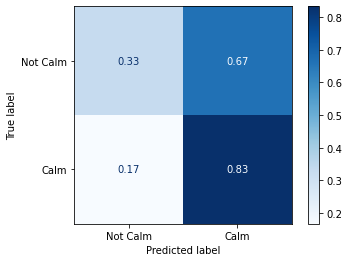

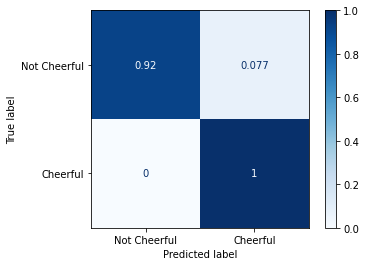

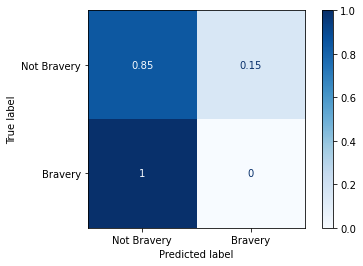

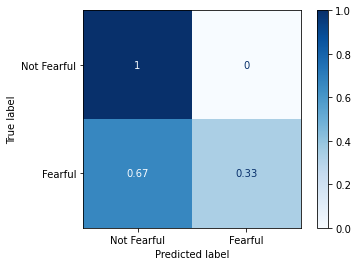

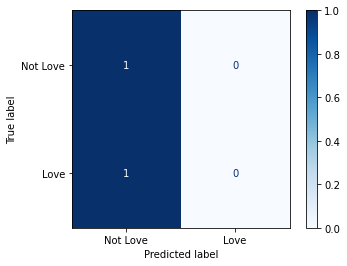

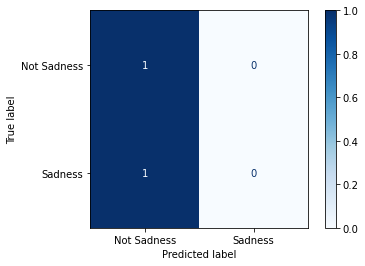

In [6]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("Vanilla",x_train,ovr_train[i],random_search_nu, themes[i], verbose = False)
    test_res("Vanilla",x_val,ovr_val[i],random_search_nu, themes[i])

Best Score: 0.8916
Random Oversampling Train Accuracy: 97.9798%
[1 1 0 1 0 1 1 0 0 1 1 1 1 0 0]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
Random Oversampling Validation Accuracy: 53.33%
Random Oversampling F1-score: 0.53
Random Oversampling Precision Score: 0.58
Random Oversampling Recall Score: 0.53
Random Oversampling ROC-AUC Score: 0.56

Best Score: 0.9449
Random Oversampling Train Accuracy: 100.0000%
[0 0 0 0 0 1 0 0 1 0 1 0 0 0 0]
[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 80.00%
Random Oversampling F1-score: 0.82
Random Oversampling Precision Score: 0.84
Random Oversampling Recall Score: 0.80
Random Oversampling ROC-AUC Score: 0.67

Best Score: 0.9736
Random Oversampling Train Accuracy: 99.7475%
[0 0 0 0 1 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 73.33%
Random Oversampling F1-score: 0.73
Random Oversampling Precision Score: 0.73
Random Oversampling Recall Score: 0.73
Random Oversampling ROC-AUC Score: 0.42



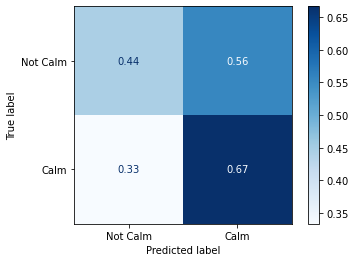

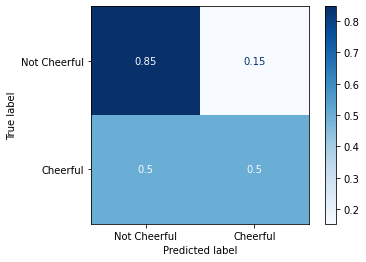

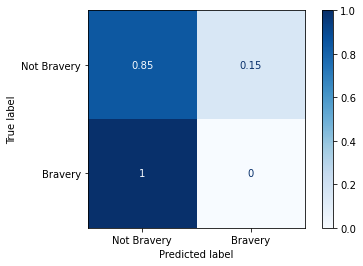

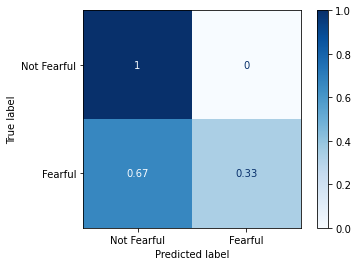

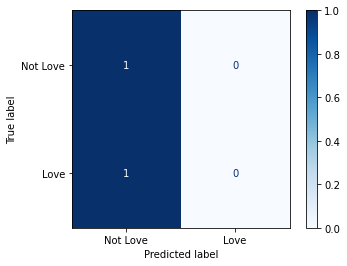

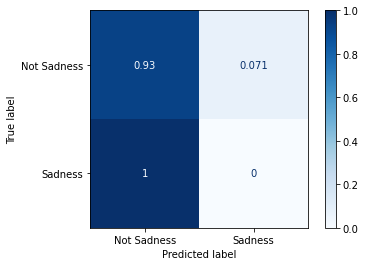

In [7]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("Random Oversampling",x_os,ovr_y_os[i],random_search_nu,themes[i], verbose = False)
    test_res("Random Oversampling",x_val,ovr_val[i],random_search_nu,themes[i])

Best Score: 0.8815
break_ties => False
kernel => rbf
max_iter => 600
nu => 0.09631796499444374
probability => False
shrinking => False
Splits: 10
SMOTE Train Accuracy: 99.8737%
[1 1 0 1 0 0 1 0 0 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
SMOTE Validation Accuracy: 73.33%
SMOTE F1-score: 0.73
SMOTE Precision Score: 0.84
SMOTE Recall Score: 0.73
SMOTE ROC-AUC Score: 0.78

Best Score: 0.9449
break_ties => False
kernel => rbf
max_iter => 600
nu => 0.014959296122064349
probability => False
shrinking => False
Splits: 10
SMOTE Train Accuracy: 99.8737%
[0 0 0 0 0 1 0 1 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
SMOTE Validation Accuracy: 93.33%
SMOTE F1-score: 0.94
SMOTE Precision Score: 0.96
SMOTE Recall Score: 0.93
SMOTE ROC-AUC Score: 0.96

Best Score: 0.9712
break_ties => False
kernel => rbf
max_iter => 600
nu => 0.010367142585351452
probability => True
shrinking => False
Splits: 10
SMOTE Train Accuracy: 100.0000%
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]
[0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
SMOTE

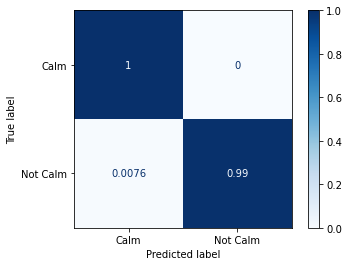

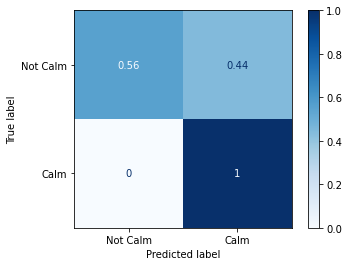

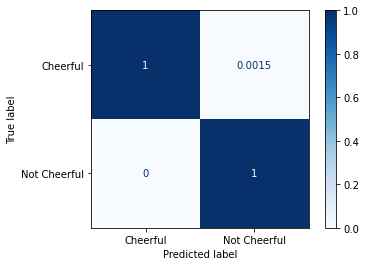

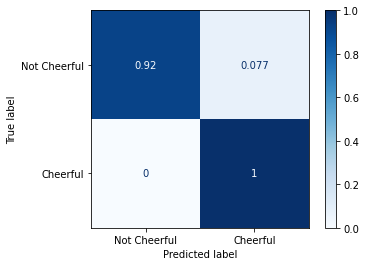

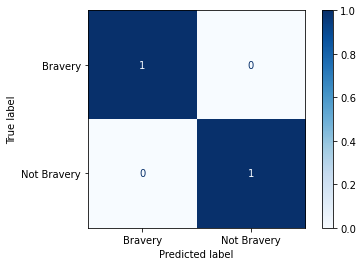

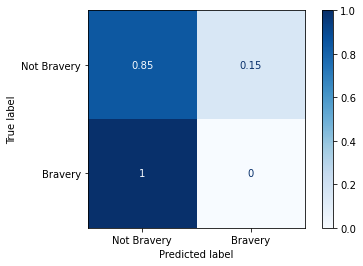

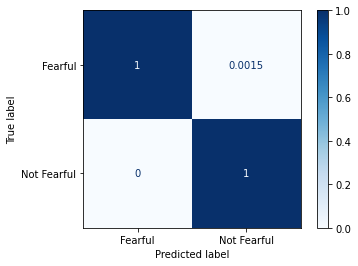

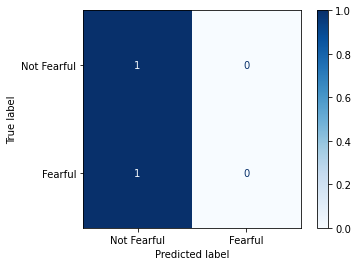

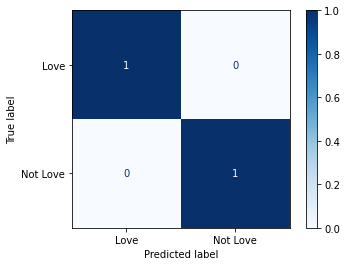

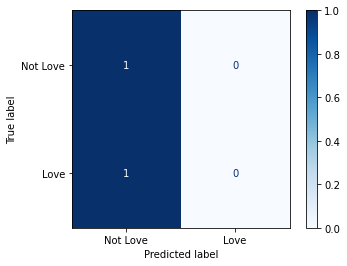

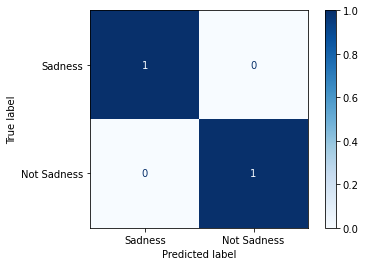

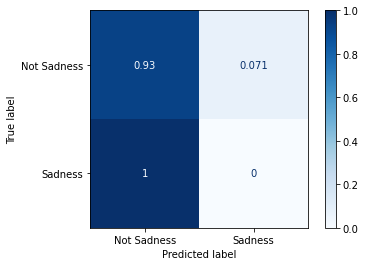

In [8]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("SMOTE",x_smote,ovr_y_smote[i],random_search_nu,themes[i])
    test_res("SMOTE",x_val,ovr_val[i],random_search_nu,themes[i])

In [3]:
# extract data from files
x_train, y_train = extract_data("Adam_Set.csv")
x_val, y_val = extract_data("Adam_Validation_Set.csv")

# scale data values
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

# feature selection
num_features = 45
feat_sel = VarianceThreshold()
x_train = feat_sel.fit_transform(x_train)
# WINNER : 42.86% 0.34
feat_sel_2 = SelectFromModel(estimator=DecisionTreeClassifier(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=RandomForestClassifier(n_estimators=100,\
#                                              random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=LogisticRegression(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=svm.LinearSVC(C=0.01, penalty="l1", dual=False,\
#                                     random_state=481516234))
# feat_sel_2 = SelectKBest(mutual_info_classif,k=num_features)
x_train = feat_sel_2.fit_transform(x_train,y_train)
x_val = feat_sel_2.transform(feat_sel.transform(x_val))
# print("After Variance Threshold Feature Selection:",x_train.shape)

rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed, k_neighbors = 2)
x_smote, y_smote = oversampler.fit_resample(x_train,y_train)
print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",\
                                random_state=rand_seed)
x_os, y_os = oversampler.fit_resample(x_train,y_train)
print(x_os.shape,y_os.shape)

(792, 49) (792,)
(792, 49) (792,)


In [9]:
# SVM, Grid Search
k_folds = 10
random_search_iterations = 200
rand_seed = 3249807

parameters = {
    'C': np.logspace(-10,0,100), 
    'gamma': ['scale', 'auto'], 
    'kernel':['linear', 'rbf', 'sigmoid', 'poly'], 
    'shrinking':[True, False], 
    'probability':[True, False],
    'max_iter' : [600],
    'break_ties' : [True, False]
}

svmc = svm.SVC(random_state=rand_seed)
random_search_svm = RandomizedSearchCV(svmc, parameters,\
                                       random_state=rand_seed,\
                                       n_iter=random_search_iterations,\
                                       cv=k_folds,n_jobs=-1)

Best Score: 0.5939
Vanilla Train Accuracy: 77.5974%
[1 1 0 0 1 0 1 0 0 0 1 0 1 1 1]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
Vanilla Validation Accuracy: 60.00%
Vanilla F1-score: 0.60
Vanilla Precision Score: 0.63
Vanilla Recall Score: 0.60
Vanilla ROC-AUC Score: 0.61

Best Score: 0.8280
Vanilla Train Accuracy: 82.7922%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
Vanilla Validation Accuracy: 86.67%
Vanilla F1-score: 0.80
Vanilla Precision Score: 0.75
Vanilla Recall Score: 0.87
Vanilla ROC-AUC Score: 0.50

Best Score: 0.8442
Vanilla Train Accuracy: 88.9610%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
Vanilla Validation Accuracy: 86.67%
Vanilla F1-score: 0.80
Vanilla Precision Score: 0.75
Vanilla Recall Score: 0.87
Vanilla ROC-AUC Score: 0.50

Best Score: 0.8052
Vanilla Train Accuracy: 80.5195%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
Vanilla Validation Accuracy: 80.00%
Vanilla F1-score: 0.71
Vanilla Precision Score: 0.64
Vanilla Reca

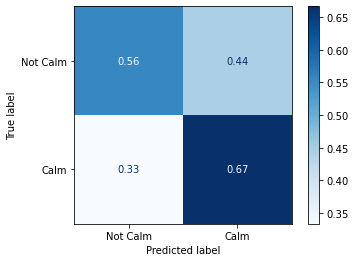

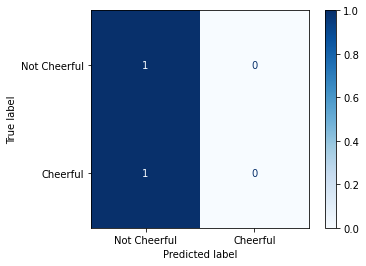

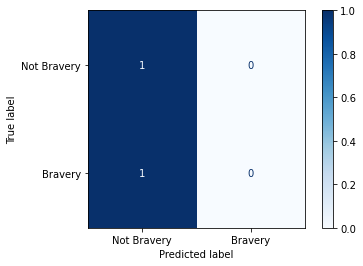

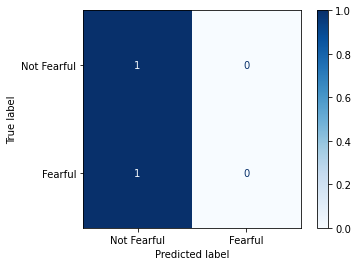

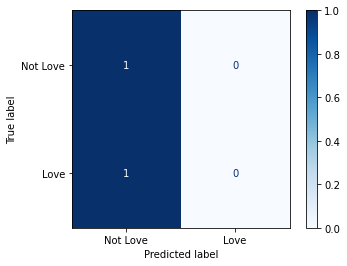

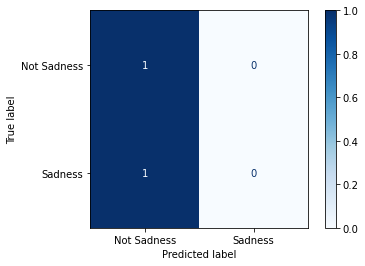

In [10]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("Vanilla",x_train,ovr_train[i],random_search_svm, themes[i], verbose = False)
    test_res("Vanilla",x_val,ovr_val[i],random_search_svm, themes[i])

Best Score: 0.8487
Random Oversampling Train Accuracy: 91.0354%
[0 0 0 0 0 0 1 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
Random Oversampling Validation Accuracy: 60.00%
Random Oversampling F1-score: 0.54
Random Oversampling Precision Score: 0.57
Random Oversampling Recall Score: 0.60
Random Oversampling ROC-AUC Score: 0.53

Best Score: 0.8828
Random Oversampling Train Accuracy: 93.3081%
[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 100.00%
Random Oversampling F1-score: 1.00
Random Oversampling Precision Score: 1.00
Random Oversampling Recall Score: 1.00
Random Oversampling ROC-AUC Score: 1.00

Best Score: 0.9053
Random Oversampling Train Accuracy: 92.5505%
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 93.33%
Random Oversampling F1-score: 0.92
Random Oversampling Precision Score: 0.94
Random Oversampling Recall Score: 0.93
Random Oversampling ROC-AUC Score: 0.75



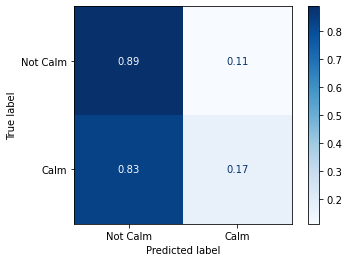

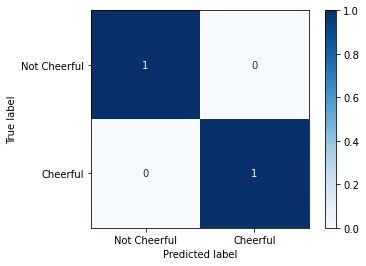

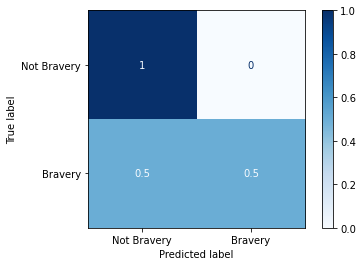

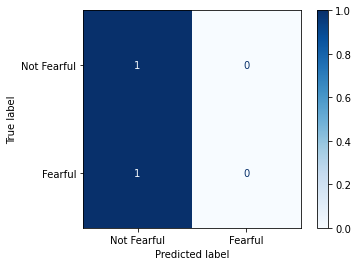

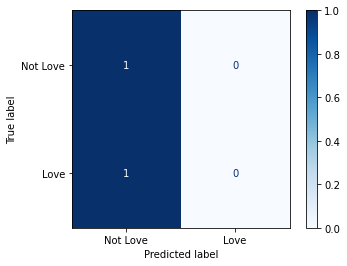

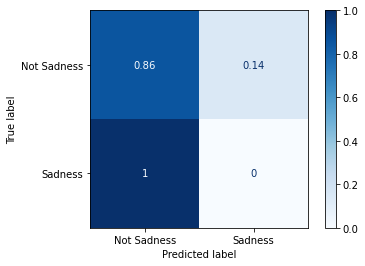

In [11]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("Random Oversampling",x_os,ovr_y_os[i],random_search_svm,themes[i], verbose = False)
    test_res("Random Oversampling",x_val,ovr_val[i],random_search_svm,themes[i])

Best Score: 0.8499
shrinking => True
probability => False
max_iter => 600
kernel => poly
gamma => scale
break_ties => True
C => 1.0
Splits: 10
SMOTE Train Accuracy: 91.4141%
[0 1 0 0 0 0 1 0 0 0 0 0 1 0 1]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
SMOTE Validation Accuracy: 60.00%
SMOTE F1-score: 0.58
SMOTE Precision Score: 0.58
SMOTE Recall Score: 0.60
SMOTE ROC-AUC Score: 0.56

Best Score: 0.8728
shrinking => True
probability => False
max_iter => 600
kernel => poly
gamma => scale
break_ties => True
C => 1.0
Splits: 10
SMOTE Train Accuracy: 92.6768%
[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
SMOTE Validation Accuracy: 100.00%
SMOTE F1-score: 1.00
SMOTE Precision Score: 1.00
SMOTE Recall Score: 1.00
SMOTE ROC-AUC Score: 1.00

Best Score: 0.9232
shrinking => True
probability => False
max_iter => 600
kernel => poly
gamma => scale
break_ties => True
C => 1.0
Splits: 10
SMOTE Train Accuracy: 95.3283%
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
SMOTE Validatio

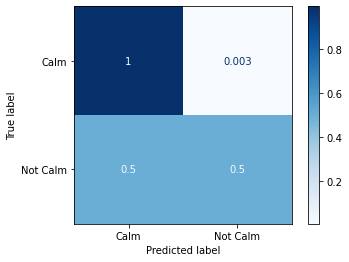

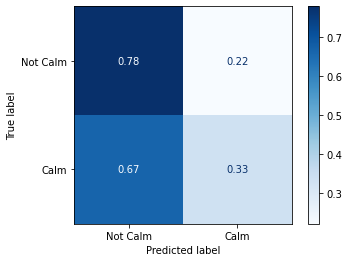

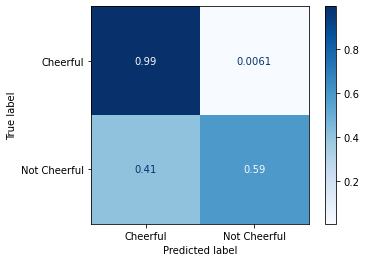

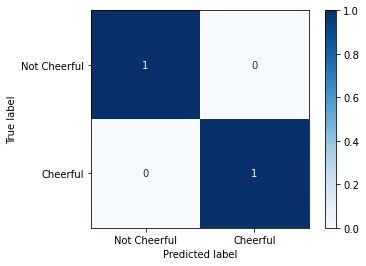

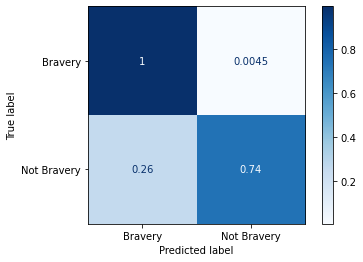

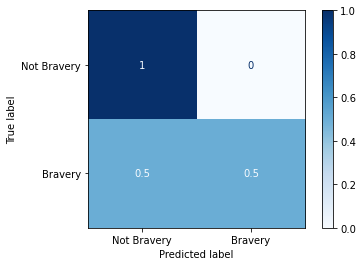

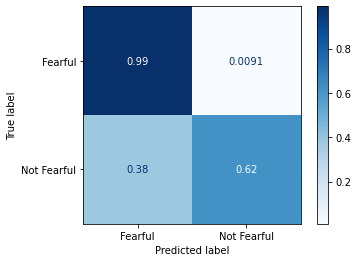

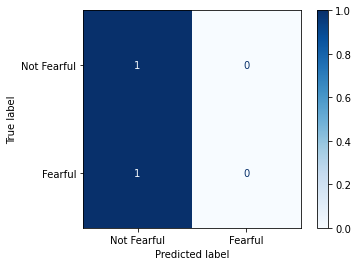

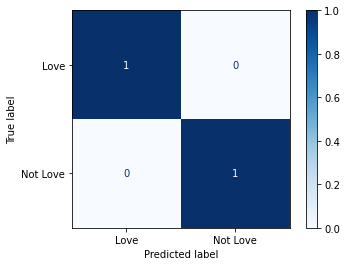

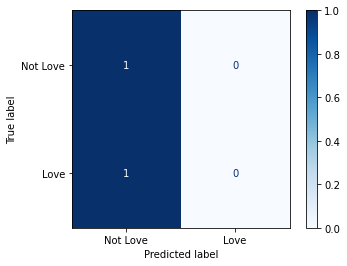

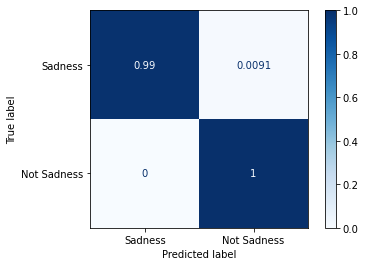

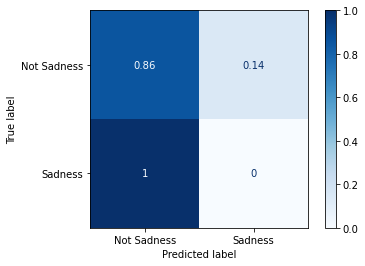

In [12]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("SMOTE",x_smote,ovr_y_smote[i],random_search_svm,themes[i])
    test_res("SMOTE",x_val,ovr_val[i],random_search_svm,themes[i])

In [14]:
## extract data from files
x_train, y_train = extract_data("Adam_Set.csv")
x_val, y_val = extract_data("Adam_Validation_Set.csv")

# scale data values
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

# feature selection
num_features = 45
feat_sel = VarianceThreshold()
x_train = feat_sel.fit_transform(x_train)
# feat_sel_2 = SelectFromModel(estimator=DecisionTreeClassifier(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=RandomForestClassifier(n_estimators=100,\
#                                              random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=LogisticRegression(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=svm.LinearSVC(C=0.01, penalty="l1", dual=False,\
#                                     random_state=481516234))
# 28.57% 0.28
feat_sel_2 = SelectKBest(chi2,k=num_features)
x_train = feat_sel_2.fit_transform(x_train,y_train)
x_val = feat_sel_2.transform(feat_sel.transform(x_val))
# print("After Variance Threshold Feature Selection:",x_train.shape)

rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed, k_neighbors = 2)
x_smote, y_smote = oversampler.fit_resample(x_train,y_train)
print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",\
                                random_state=rand_seed)
x_os, y_os = oversampler.fit_resample(x_train,y_train)
print(x_os.shape,y_os.shape)

(792, 45) (792,)
(792, 45) (792,)


In [15]:
# LinearSVM, Randomized Search
k_folds = 10
random_search_iterations = 200
rand_seed = 3249807

parameters = {
    'penalty':['l1', 'l2'],
    'loss':['hinge', 'squared_hinge'], 
    'dual':[True, False], 
    'C': np.logspace(-10,0,100), 
    'multi_class':['ovr', 'crammer_singer'], 
    'fit_intercept' : [True,False],
    'max_iter':[600]
}

linearsvm = svm.LinearSVC(random_state=rand_seed)
random_search_linear = RandomizedSearchCV(linearsvm, parameters,\
                                          random_state=rand_seed,\
                                          n_iter=random_search_iterations,\
                                          cv=k_folds,n_jobs=-1)

Best Score: 0.5813
Vanilla Train Accuracy: 62.6623%
[1 1 0 1 0 0 0 0 0 0 1 0 1 1 1]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
Vanilla Validation Accuracy: 66.67%
Vanilla F1-score: 0.67
Vanilla Precision Score: 0.68
Vanilla Recall Score: 0.67
Vanilla ROC-AUC Score: 0.67

Best Score: 0.8280
Vanilla Train Accuracy: 82.7922%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
Vanilla Validation Accuracy: 86.67%
Vanilla F1-score: 0.80
Vanilla Precision Score: 0.75
Vanilla Recall Score: 0.87
Vanilla ROC-AUC Score: 0.50

Best Score: 0.8376
Vanilla Train Accuracy: 83.7662%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
Vanilla Validation Accuracy: 86.67%
Vanilla F1-score: 0.80
Vanilla Precision Score: 0.75
Vanilla Recall Score: 0.87
Vanilla ROC-AUC Score: 0.50

Best Score: 0.8116
Vanilla Train Accuracy: 81.1688%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
Vanilla Validation Accuracy: 80.00%
Vanilla F1-score: 0.71
Vanilla Precision Score: 0.64
Vanilla Reca

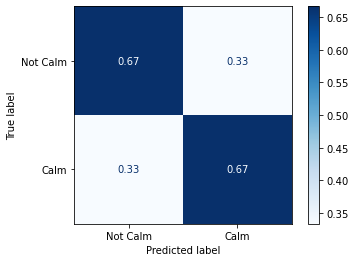

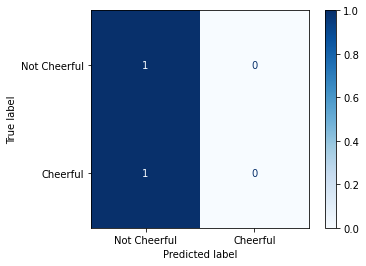

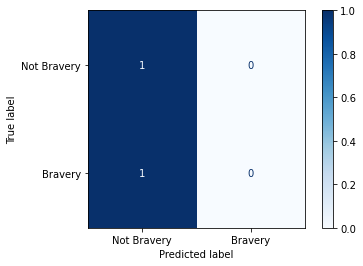

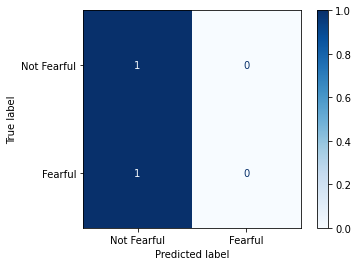

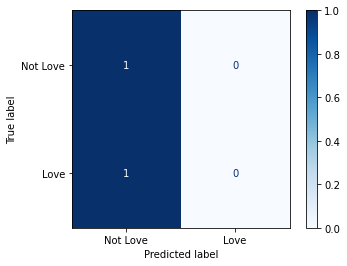

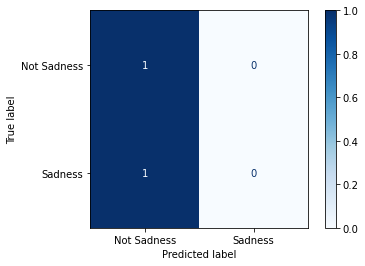

In [16]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("Vanilla",x_train,ovr_train[i],random_search_linear, themes[i], verbose = False)
    test_res("Vanilla",x_val,ovr_val[i],random_search_linear, themes[i])

Best Score: 0.8334
Random Oversampling Train Accuracy: 83.3333%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
Random Oversampling Validation Accuracy: 60.00%
Random Oversampling F1-score: 0.45
Random Oversampling Precision Score: 0.36
Random Oversampling Recall Score: 0.60
Random Oversampling ROC-AUC Score: 0.50

Best Score: 0.8371
Random Oversampling Train Accuracy: 83.7121%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 86.67%
Random Oversampling F1-score: 0.80
Random Oversampling Precision Score: 0.75
Random Oversampling Recall Score: 0.87
Random Oversampling ROC-AUC Score: 0.50

Best Score: 0.8384
Random Oversampling Train Accuracy: 83.9646%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 86.67%
Random Oversampling F1-score: 0.80
Random Oversampling Precision Score: 0.75
Random Oversampling Recall Score: 0.87
Random Oversampling ROC-AUC Score: 0.50

B

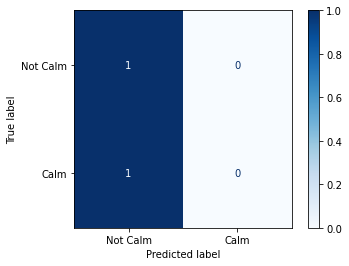

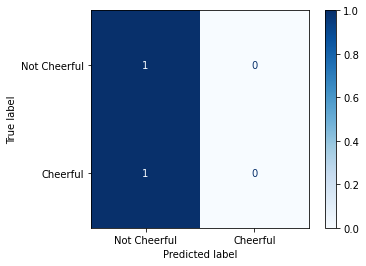

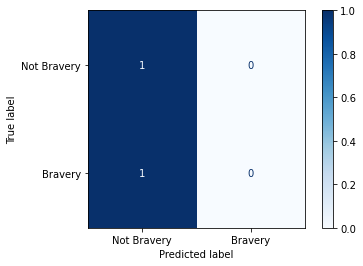

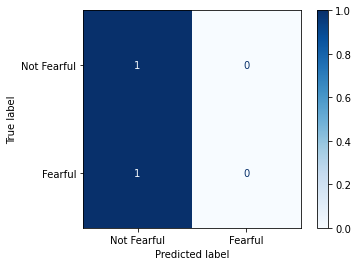

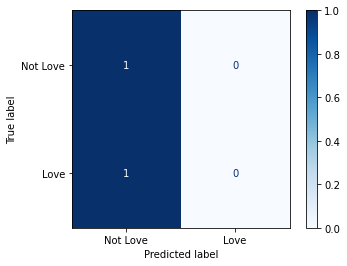

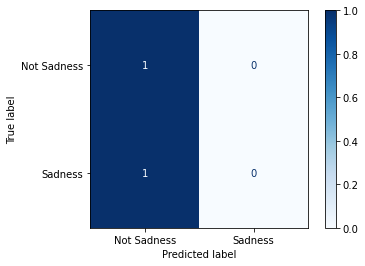

In [17]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("Random Oversampling",x_os,ovr_y_os[i],random_search_linear,themes[i], verbose = False)
    test_res("Random Oversampling",x_val,ovr_val[i],random_search_linear,themes[i])

Best Score: 0.8334
penalty => l2
multi_class => crammer_singer
max_iter => 600
loss => squared_hinge
fit_intercept => False
dual => False
C => 0.007564633275546291
Splits: 10
SMOTE Train Accuracy: 83.3333%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
SMOTE Validation Accuracy: 60.00%
SMOTE F1-score: 0.45
SMOTE Precision Score: 0.36
SMOTE Recall Score: 0.60
SMOTE ROC-AUC Score: 0.50

Best Score: 0.8334
penalty => l2
multi_class => crammer_singer
max_iter => 600
loss => squared_hinge
fit_intercept => False
dual => False
C => 0.007564633275546291
Splits: 10
SMOTE Train Accuracy: 83.3333%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
SMOTE Validation Accuracy: 86.67%
SMOTE F1-score: 0.80
SMOTE Precision Score: 0.75
SMOTE Recall Score: 0.87
SMOTE ROC-AUC Score: 0.50

Best Score: 0.8346
penalty => l1
multi_class => crammer_singer
max_iter => 600
loss => squared_hinge
fit_intercept => False
dual => False
C => 0.49770235643321137
Splits: 10
SMOTE Train Accu

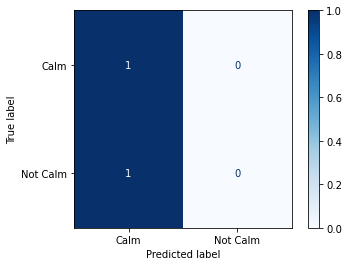

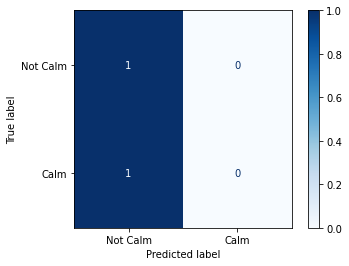

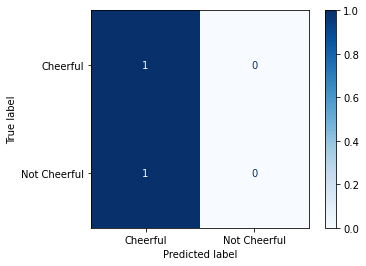

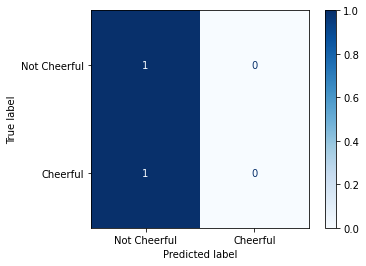

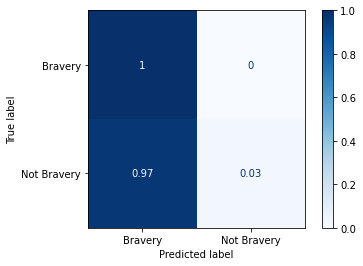

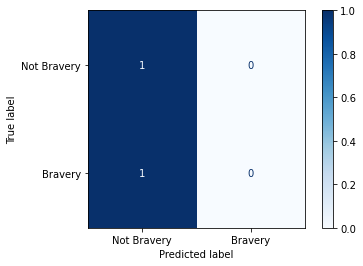

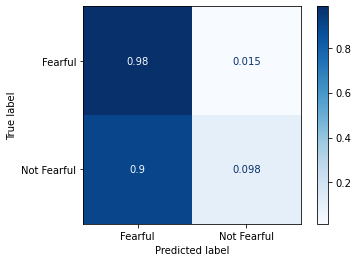

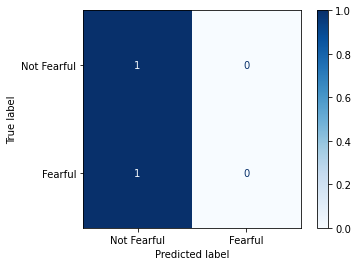

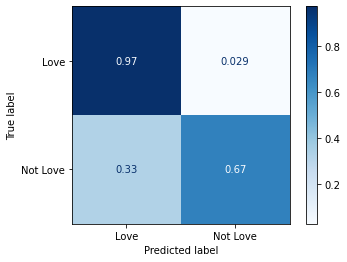

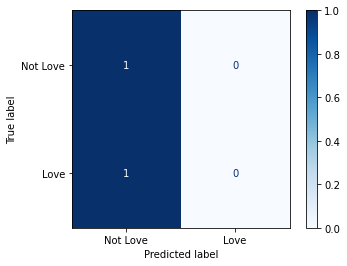

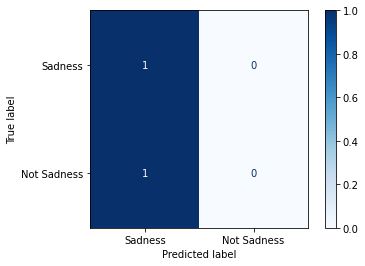

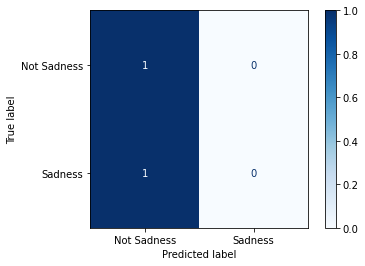

In [18]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("SMOTE",x_smote,ovr_y_smote[i],random_search_linear,themes[i])
    test_res("SMOTE",x_val,ovr_val[i],random_search_linear,themes[i])